In [20]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [21]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util
from tf_unet import image_util

In [22]:
nx = 640
ny = 360

In [23]:
generator = image_util.ImageDataProvider(search_path='F:\\MOY_PhD_DATA_LOCAL\\2017_watsen\\data\\frames\\*')

Number of files used: 1055


In [24]:
x_test, y_test = generator(40)

In [25]:
np.sum(y_test)

2272760.0

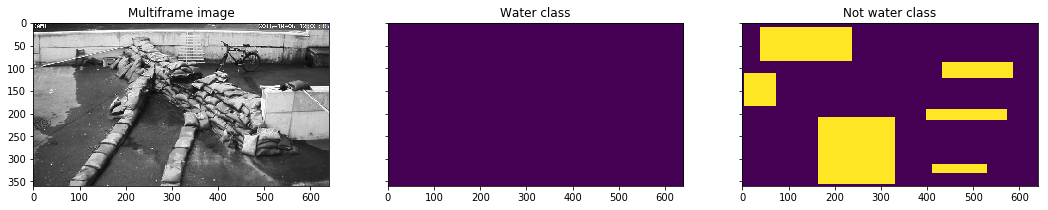

In [26]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(18,3))
ax[0].set_title('Multiframe image')
ax[0].imshow(x_test[0,...], aspect="auto")
ax[1].set_title('Water class')
ax[1].imshow(y_test[1,...,0], aspect="auto")
ax[2].set_title('Not water class')
ax[2].imshow(y_test[0,...,1], aspect="auto")

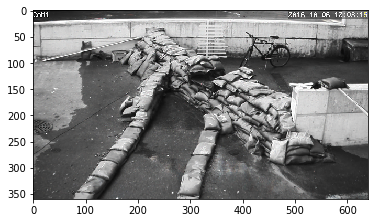

In [19]:
plt.imshow(x_test[0,...])

In [27]:
net = unet.Unet(channels=3, n_class=2, layers=3, features_root=16, cost_kwargs=dict(class_weights=[5,1]))

2017-07-26 18:20:45,622 Layers 3, features 16, filter size 3x3, pool size: 2x2


In [32]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [33]:
path = trainer.train(generator, "./unet_trained", training_iters=30, epochs=10, display_step=2)

2017-07-26 18:22:47,047 Removing 'Q:\Abteilungsprojekte\eng\SWWData\Matthew\Workspace\watsen_unet\demo\water_level\prediction'
2017-07-26 18:22:47,066 Removing 'Q:\Abteilungsprojekte\eng\SWWData\Matthew\Workspace\watsen_unet\demo\water_level\unet_trained'
2017-07-26 18:22:47,087 Allocating 'Q:\Abteilungsprojekte\eng\SWWData\Matthew\Workspace\watsen_unet\demo\water_level\prediction'
2017-07-26 18:22:48,581 Verification error= 24.3%, loss= 0.5918
2017-07-26 18:22:53,799 Start optimization
2017-07-26 18:22:54,362 Iter 0, Minibatch Loss= 0.2772, Training Accuracy= 0.0232, Minibatch error= 26.0%
2017-07-26 18:22:54,972 Iter 2, Minibatch Loss= 0.2572, Training Accuracy= 0.9776, Minibatch error= 74.1%
2017-07-26 18:22:55,587 Iter 4, Minibatch Loss= 0.2410, Training Accuracy= 0.9776, Minibatch error= 74.1%
2017-07-26 18:22:56,207 Iter 6, Minibatch Loss= 0.2290, Training Accuracy= 0.9776, Minibatch error= 74.1%
2017-07-26 18:22:56,849 Iter 8, Minibatch Loss= 0.2187, Training Accuracy= 0.9776, M

InvalidArgumentError: Infinity in summary histogram for: norm_grads_2
	 [[Node: norm_grads_2 = HistogramSummary[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"](norm_grads_2/tag, Variable_31/read/_109)]]

Caused by op 'norm_grads_2', defined at:
  File "c:\opt\python35\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\opt\python35\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\opt\python35\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\opt\python35\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\opt\python35\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "c:\opt\python35\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "c:\opt\python35\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "c:\opt\python35\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\opt\python35\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "c:\opt\python35\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "c:\opt\python35\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "c:\opt\python35\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\opt\python35\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "c:\opt\python35\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "c:\opt\python35\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "c:\opt\python35\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\opt\python35\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\opt\python35\lib\site-packages\IPython\core\interactiveshell.py", line 2683, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\opt\python35\lib\site-packages\IPython\core\interactiveshell.py", line 2787, in run_ast_nodes
    if self.run_code(code, result):
  File "c:\opt\python35\lib\site-packages\IPython\core\interactiveshell.py", line 2847, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-6628d0f706df>", line 1, in <module>
    path = trainer.train(generator, "./unet_trained", training_iters=30, epochs=10, display_step=2)
  File "C:\Users\moydevma\AppData\Roaming\Python\Python35\site-packages\tf_unet-0.1.0-py3.5.egg\tf_unet\unet.py", line 407, in train
    init = self._initialize(training_iters, output_path, restore)
  File "C:\Users\moydevma\AppData\Roaming\Python\Python35\site-packages\tf_unet-0.1.0-py3.5.egg\tf_unet\unet.py", line 358, in _initialize
    tf.summary.histogram('norm_grads', self.norm_gradients_node)
  File "c:\opt\python35\lib\site-packages\tensorflow\python\summary\summary.py", line 221, in histogram
    tag=scope.rstrip('/'), values=values, name=scope)
  File "c:\opt\python35\lib\site-packages\tensorflow\python\ops\gen_logging_ops.py", line 131, in _histogram_summary
    name=name)
  File "c:\opt\python35\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "c:\opt\python35\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "c:\opt\python35\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Infinity in summary histogram for: norm_grads_2
	 [[Node: norm_grads_2 = HistogramSummary[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"](norm_grads_2/tag, Variable_31/read/_109)]]


In [34]:
x_test, y_test = generator(1)

prediction = net.predict("./unet_trained/model.cpkt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.cpkt


2017-07-26 18:23:32,557 Restoring parameters from ./unet_trained/model.cpkt
2017-07-26 18:23:33,431 Model restored from file: ./unet_trained/model.cpkt


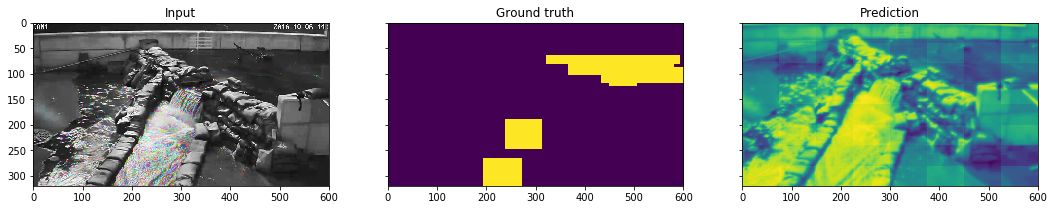

In [40]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(18,3))
ax[0].imshow(x_test[0,...], aspect="auto")
ax[1].imshow(y_test[0,...,0], aspect="auto")
mask = -prediction[0,...,0] 
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")